# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [52]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import StandardScaler



In [53]:
# Read our data into a dataframe
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [54]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [55]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [56]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [57]:
df.isnull().sum() #Detect missing values for an array-like object

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Number of bankrupt vs non-bankrupt

In [58]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [59]:
# rename 'Bankrupt?' to 'Bankrupt'
df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace=True, errors='raise')

In [67]:
# Separate features and target
X = df.drop('Bankrupt', axis=1)  # All features except the target
y = df['Bankrupt']               # Target feature

In [73]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and test data
# test_size = 0.2: 20% of my sample is test data
# random_state = some_number(doesn't matter, mostly use 42):ur split will be always the same
# stratify = y: try to evenly distribute the values of y in each split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [74]:
# Create Proximity matrix
# normalize = 0: pm / n_tree
# normalize ≠ 0: Normalize columns to sum to 1
def proximity_matrix(model, x, normalize=0):
    n_tree = len(model.estimators_)
    
    # Apply trees in the forest to X, return leaf indices.
    leaf = model.apply(x)  # shape = (x.shape[0], n_tree)
    
    pm = np.zeros(shape=(x.shape[0], x.shape[0]))
    for i in range(n_tree):
        t = leaf[:, i]
        pm += np.equal.outer(t, t) * 1.

    np.fill_diagonal(pm, 0)    
    if normalize == 0:
        return pm / n_tree
    else:
        return pm / pm.sum(axis=0, keepdims=True)

In [75]:
# n_estimators: no. of decision trees in the forest
n_estimators = 50
n_depth = 5

# Missing value imputation using the proximity matrix
for i in range(5):   # 5 iterations, training 5 times
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=n_depth,
                                   oob_score=True)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, oob_score=True)

In [76]:
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth, oob_score=True)
model.fit(x_train, y_train)  # Train on the imputed data

x_data = np.vstack([x_train, x_test])  # Combine training and test data
pm = proximity_matrix(model, x_data, normalize=1)  # Calculate proximity matrix for combined data


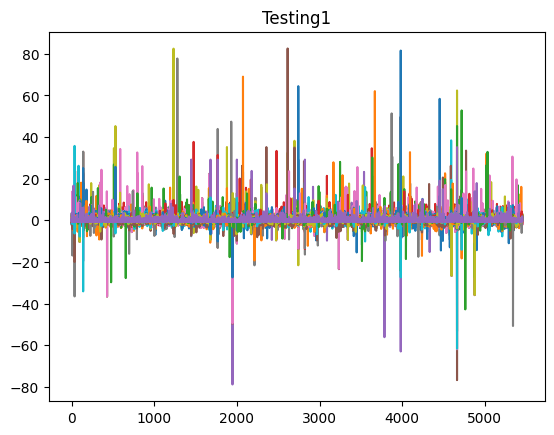

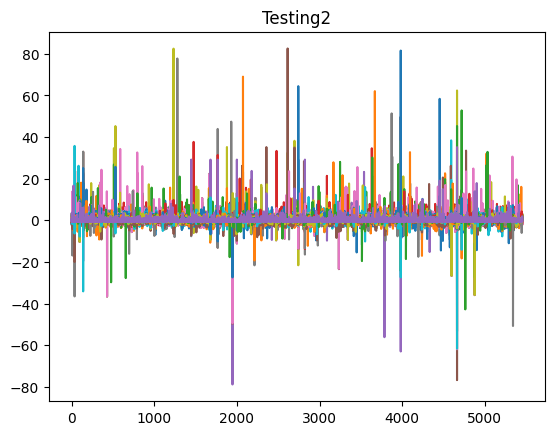

In [77]:

plt.plot(x_train)
plt.title('Testing1')
plt.show()


plt.plot(x_train)
plt.title('Testing2')
plt.show()
